In [2]:
# Importing packages
import math
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import nc_time_axis
from dask.diagnostics import ProgressBar
import re
from xmovie import Movie
%matplotlib inline
import imageio
import math
import pandas as pd

In [3]:
gridpath = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/GRID/ocean.static.nc')
grid = xr.open_dataset(gridpath)

In [4]:
mld_ppp = xr.open_dataset('/home/saumyam/mldppp')
npp_ppp = xr.open_dataset('/home/saumyam/nppppp.nc')


In [5]:
rootdir = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/pp/')
ppname = 'ocean_month'
ppname2 = 'ocean_cobalt_omip_2d'
ppname3 = 'ocean_cobalt_omip_sfc'

localdir = '/ts/monthly/5yr/'

# minor helper method - returns the ppname for a particular driver
def pp(driver):
    if driver=='tos' or driver=='sos' or driver=='MLD_003':
        return 'ocean_month'
    elif re.search('intpp*',driver):
        return 'ocean_cobalt_omip_2d'
    elif re.search('os',driver):
        return 'ocean_cobalt_omip_sfc'

In [6]:
#returns control variance by month, repeated for 10 years
def ctrl_std(driver):
    # ds = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/'+driver)
    ds = xr.open_mfdataset(rootdir+pp(driver)+localdir+'*'+driver+'.nc')
    ds = ds.chunk({'time':60})

    control_monthly = ds[driver].groupby('time.month')
    control_std = control_monthly.std()

    return control_std

In [5]:
mld_std = ctrl_std('MLD_003',mld_ppp)

In [6]:
mld_std.mean(axis=0)

<xarray.DataArray 'MLD_003' (yh: 576, xh: 720)>
dask.array<mean_agg-aggregate, shape=(576, 720), dtype=float32, chunksize=(576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'Climatological variance in September, MLD')

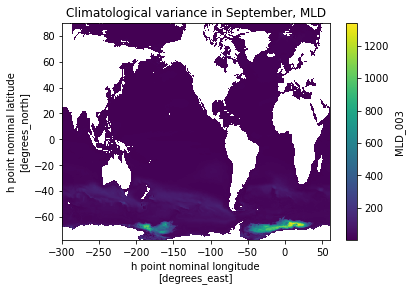

In [7]:
sept = mld_std[8]
sept.plot()
plt.title('Climatological variance in September, MLD')

In [8]:
mld_mask = np.nanpercentile(mld_std,1,axis={1,2})

In [9]:
mld_mask

array([0.22010922, 0.25395319, 0.31224643, 0.45908454, 0.5332074 ,
       0.19344436, 0.11934298, 0.33370566, 0.48070977, 0.3826125 ,
       0.27589127, 0.2149709 ])

In [10]:
sig = mld_std.where(mld_std<mld_mask[:,np.newaxis,np.newaxis])

In [11]:
repeated = np.tile(sig, (10,1,1))

significant = mld_ppp.copy(data={'MLD_003':repeated})
significant = significant.assign_coords(time=np.arange(120))

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


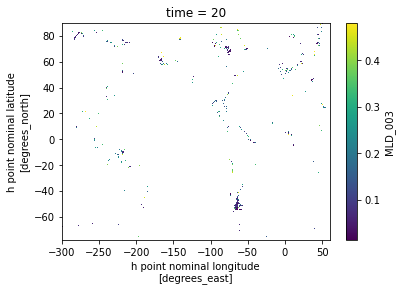

In [12]:
significant.isel(time=20)['MLD_003'].plot()

In [13]:
sig.rename({'month':'time'})

<xarray.DataArray 'MLD_003' (time: 12, yh: 576, xh: 720)>
dask.array<where, shape=(12, 576, 720), dtype=float32, chunksize=(1, 576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12

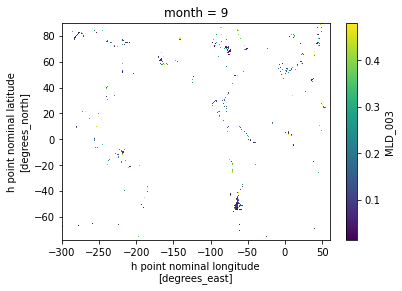

In [14]:
sig[8].plot()

In [1]:
def mask(driver,driver_ppp,percentile=10):
    d_std = ctrl_std(driver)
    
    mask = np.nanpercentile(d_std,percentile,axis={1,2}) #1 and 2 corresponds to xh, yh
    
    sig = d_std.where(d_std>mask[:,np.newaxis,np.newaxis])
    
    masked_out = d_std.where(d_std<mask[:,np.newaxis,np.newaxis])
    # tile sig to be 120 months
    
    repeated = np.tile(sig, (10,1,1))

    significant = driver_ppp.copy(data={driver:repeated})
    significant = significant.assign_coords(time=np.arange(120))
    
    masked = driver_ppp.where(significant>0)
    return masked

In [31]:
o2os_ppp = xr.open_dataset('/home/saumyam/o2os_ppp.nc')
no3os_ppp = xr.open_dataset('/home/saumyam/no3os_ppp.nc')
po4os_ppp = xr.open_dataset('/home/saumyam/po4os_ppp.nc')
phos_ppp = xr.open_dataset('/home/saumyam/phos_ppp.nc')

npp_ppp = xr.open_dataset('/home/saumyam/nppppp.nc')
tos_ppp = xr.open_dataset('/home/saumyam/tosppp.nc')
sos_ppp = xr.open_dataset('/home/saumyam/sos_ppp.nc')
mld_ppp = xr.open_dataset('/home/saumyam/mldppp')
chlos_ppp = xr.open_dataset('/home/saumyam/chlos_ppp.nc')

In [7]:
phycos_ppp = xr.open_dataset('/home/saumyam/phycos_ppp')
zoocos_ppp = xr.open_dataset('/home/saumyam/zoocos_pppp')
mask('phycos',phycos_ppp).to_netcdf('/home/saumyam/phycos_ppp_m.nc')
mask('zoocos',zoocos_ppp).to_netcdf('/home/saumyam/zoocos_ppp_m.nc')

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [28]:
mask('o2os',o2os_ppp).to_netcdf('/home/saumyam/o2os_ppp_m.nc')
mask('no3os',no3os_ppp).to_netcdf('/home/saumyam/no3os_ppp_m.nc')
mask('phos',phos_ppp).to_netcdf('/home/saumyam/phos_ppp_m.nc')
mask('po4os',po4os_ppp).to_netcdf('/home/saumyam/po4os_ppp_m.nc')

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarni

In [ ]:
mask('no3os',no3os_ppp).to_netcdf('/home/saumyam/no3os_ppp_m.nc')
mask('po4os',po4os_ppp).to_netcdf('/home/saumyam/po4os_ppp_m.nc')

In [32]:
mask('intpp',npp_ppp).to_netcdf('/home/saumyam/npp_ppp_m.nc')
mask('MLD_003',mld_ppp).to_netcdf('/home/saumyam/mld_ppp_m.nc')
mask('tos',tos_ppp).to_netcdf('/home/saumyam/tos_ppp_m.nc')
mask('sos',sos_ppp).to_netcdf('/home/saumyam/sos_ppp_m.nc')
mask('chlos',chlos_ppp).to_netcdf('/home/saumyam/chlos_ppp_m.nc')


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarni

In [43]:
def plot_all(driver):
    d_std = ctrl_std(driver)
    one = np.nanpercentile(d_std,1,axis={1,2})
    five = np.nanpercentile(d_std,5,axis={1,2})
    ten = np.nanpercentile(d_std,10,axis={1,2})
    fifteen = np.nanpercentile(d_std,15,axis={1,2})
    twenty = np.nanpercentile(d_std,20,axis={1,2})
    plt.plot(one,label='1')
    plt.plot(five,label='5')
    plt.plot(ten,label='10')
    plt.plot(fifteen,label='15')
    plt.plot(twenty,label='20')
    plt.title(driver)
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Std Deviation Cutoff')

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


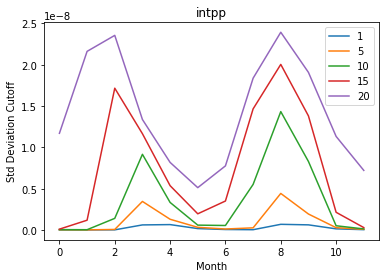

In [44]:
plot_all('intpp')

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


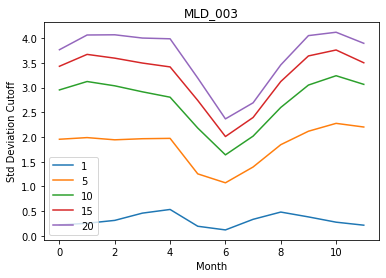

In [45]:
plot_all('MLD_003')

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


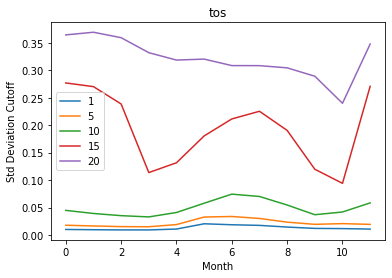

In [46]:
plot_all('tos')

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


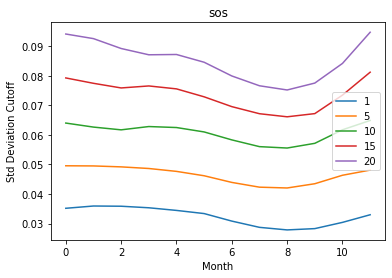

In [47]:
plot_all('sos')

In [16]:
mld_masked,sig,masked_out = mask('MLD_003',mld_ppp,10)

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


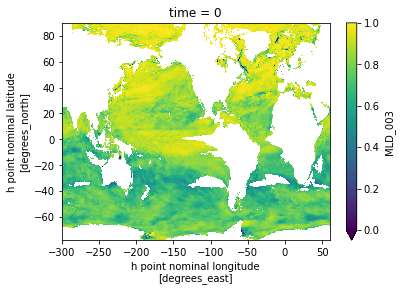

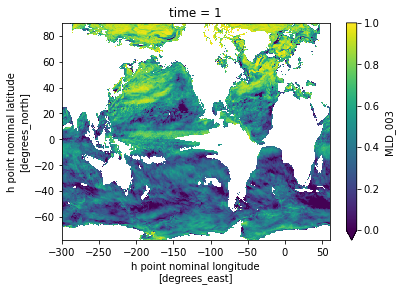

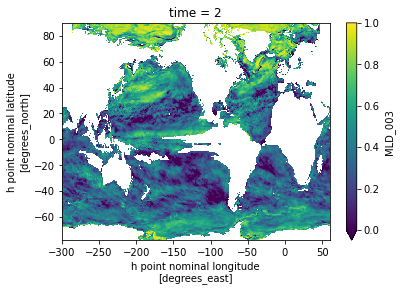

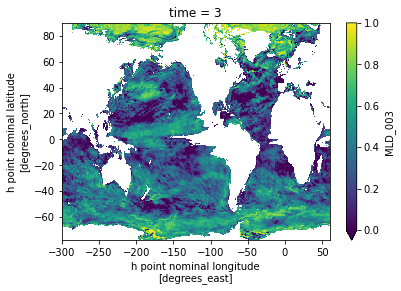

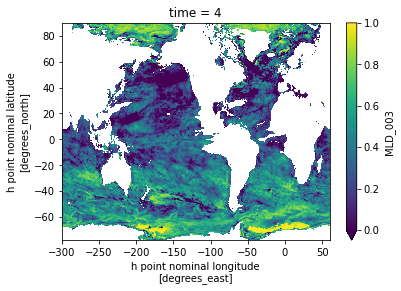

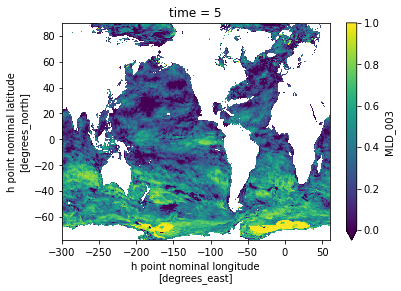

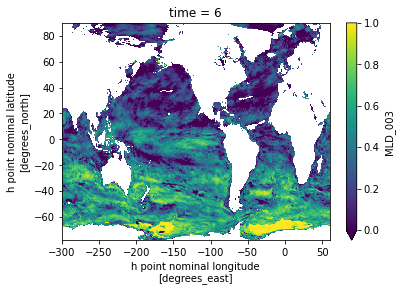

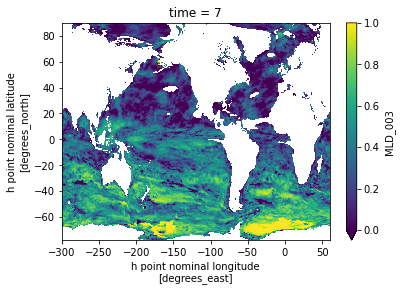

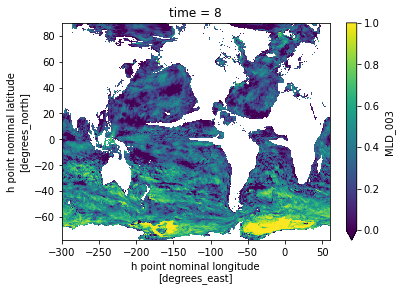

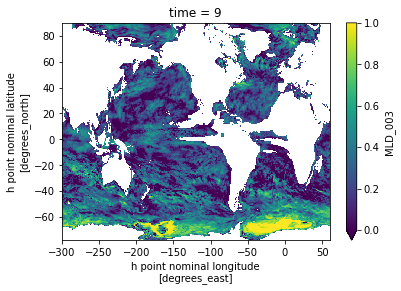

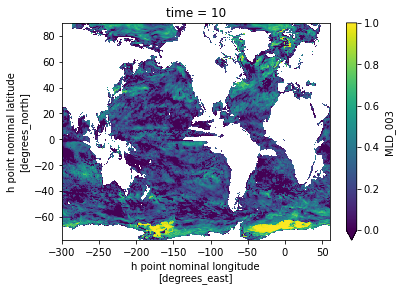

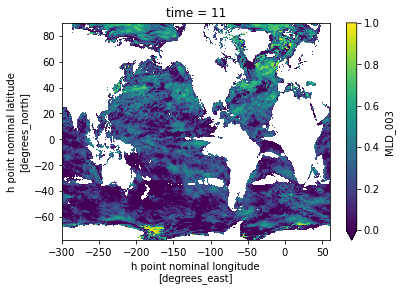

In [17]:
for m in range(12):
    mld_masked.isel(time=m)['MLD_003'].plot(vmin=0,vmax=1)
    plt.show()

In [18]:
bottom = np.nanpercentile(sept,50)

In [19]:
npp_masked,npp_sig,npp_masked_out = mask('intpp',npp_ppp,10)

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


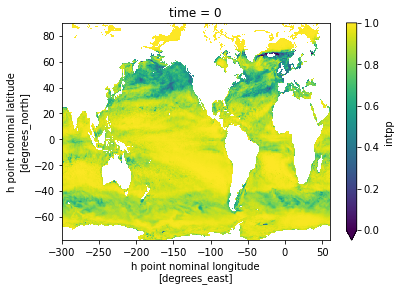

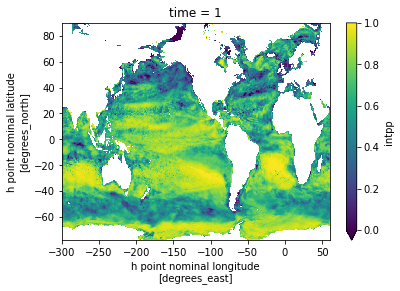

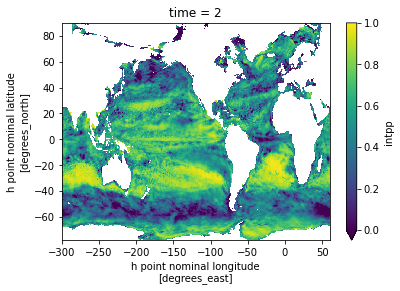

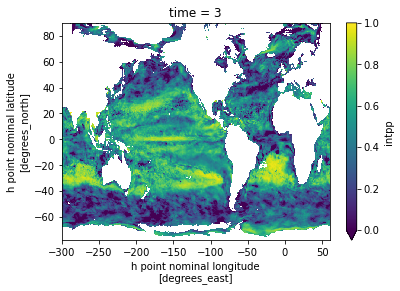

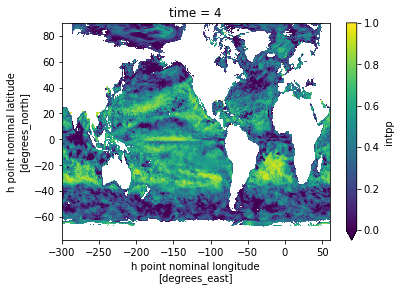

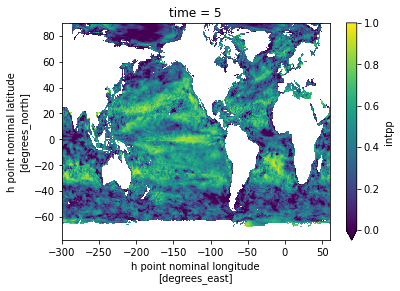

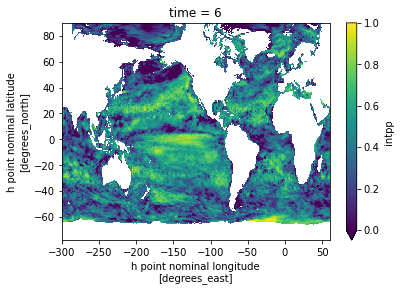

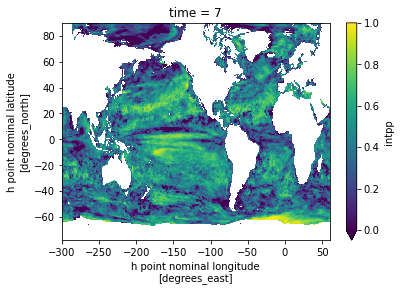

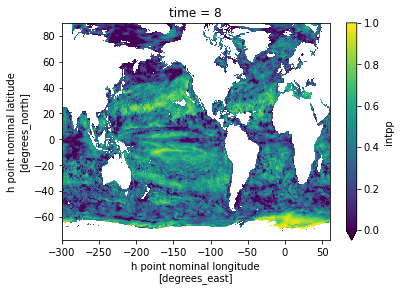

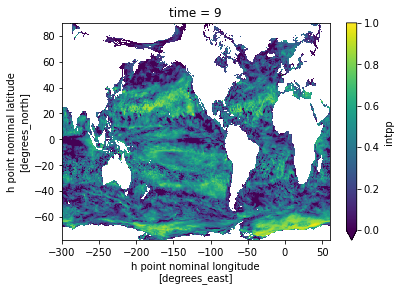

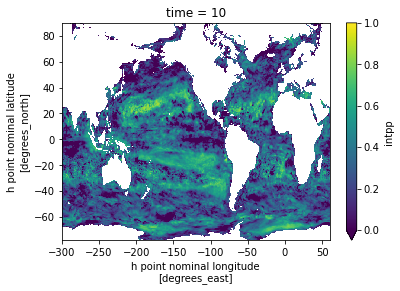

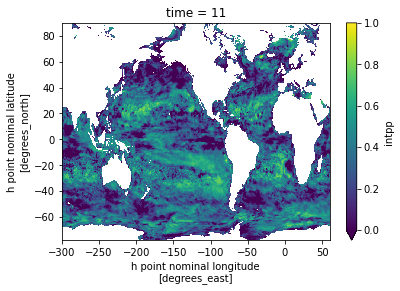

In [20]:
for m in range(12):
    npp_masked.isel(time=m)['intpp'].plot(vmin=0,vmax=1)
    plt.show()

In [21]:
bottom

6.592768669128418

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(0.0, 200.0)

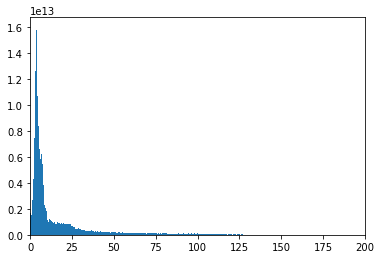

In [22]:
binning = np.append(np.linspace(0,200,num=800),1400)
pdf = plt.hist(mld_std[8].where(mld_std[8].notnull()).to_numpy().flatten(), 
               weights=grid['areacello'].to_numpy().flatten(), bins=binning)

ax=plt.gca()
ax.set_xlim([0,200])

In [23]:
pdff = pdf[0]/np.sum(pdf[0])

In [24]:
cdf2 = np.cumsum(pdff)

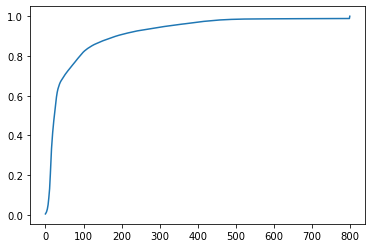

In [25]:
plt.plot(cdf2)

In [26]:
cdf2


array([0.00467915, 0.00769527, 0.01129558, 0.01550969, 0.02119454,
       0.02860932, 0.03854589, 0.05045297, 0.06694258, 0.08699552,
       0.10765139, 0.13159831, 0.16649607, 0.20701108, 0.25123241,
       0.2950298 , 0.33320877, 0.36280101, 0.39030642, 0.41361771,
       0.43511058, 0.45603399, 0.47438231, 0.49193476, 0.50813883,
       0.52518686, 0.54239611, 0.5600091 , 0.57824081, 0.59335659,
       0.60674157, 0.61740591, 0.62670031, 0.63464219, 0.64107211,
       0.64706902, 0.65284352, 0.65843988, 0.66343617, 0.66751285,
       0.67138484, 0.67463652, 0.67769298, 0.68047825, 0.68365425,
       0.68670318, 0.69007715, 0.69321162, 0.69634646, 0.69923524,
       0.70210864, 0.70489911, 0.70741352, 0.71008705, 0.71277572,
       0.71522462, 0.71786121, 0.72050482, 0.72284309, 0.72528488,
       0.72754514, 0.7296821 , 0.73194175, 0.73416517, 0.73682379,
       0.7395133 , 0.7420593 , 0.74457709, 0.74699899, 0.74946958,
       0.75181338, 0.75398017, 0.75622919, 0.75860318, 0.76102

In [27]:
np.linspace(0,200,num=400)

array([  0.        ,   0.50125313,   1.00250627,   1.5037594 ,
         2.00501253,   2.50626566,   3.0075188 ,   3.50877193,
         4.01002506,   4.5112782 ,   5.01253133,   5.51378446,
         6.01503759,   6.51629073,   7.01754386,   7.51879699,
         8.02005013,   8.52130326,   9.02255639,   9.52380952,
        10.02506266,  10.52631579,  11.02756892,  11.52882206,
        12.03007519,  12.53132832,  13.03258145,  13.53383459,
        14.03508772,  14.53634085,  15.03759398,  15.53884712,
        16.04010025,  16.54135338,  17.04260652,  17.54385965,
        18.04511278,  18.54636591,  19.04761905,  19.54887218,
        20.05012531,  20.55137845,  21.05263158,  21.55388471,
        22.05513784,  22.55639098,  23.05764411,  23.55889724,
        24.06015038,  24.56140351,  25.06265664,  25.56390977,
        26.06516291,  26.56641604,  27.06766917,  27.56892231,
        28.07017544,  28.57142857,  29.0726817 ,  29.57393484,
        30.07518797,  30.5764411 ,  31.07769424,  31.57

In [28]:
pdf[0]

array([1.68966868e+12, 1.08914082e+12, 1.30009399e+12, 1.52174173e+12,
       2.05283394e+12, 2.67752256e+12, 3.58815682e+12, 4.29971944e+12,
       5.95449610e+12, 7.24124146e+12, 7.45896149e+12, 8.64737978e+12,
       1.26017948e+13, 1.46302147e+13, 1.59685961e+13, 1.58155040e+13,
       1.37866605e+13, 1.06859374e+13, 9.93237192e+12, 8.41785069e+12,
       7.76120723e+12, 7.55556889e+12, 6.62569170e+12, 6.33829799e+12,
       5.85138962e+12, 6.15614775e+12, 6.21436469e+12, 6.36015870e+12,
       6.58358088e+12, 5.45840012e+12, 4.83339849e+12, 3.85095827e+12,
       3.35626528e+12, 2.86786375e+12, 2.32188281e+12, 2.16551916e+12,
       2.08520662e+12, 2.02088278e+12, 1.80418825e+12, 1.47211682e+12,
       1.39819640e+12, 1.17420379e+12, 1.10370593e+12, 1.00577732e+12,
       1.14687371e+12, 1.10098802e+12, 1.21836143e+12, 1.13187488e+12,
       1.13200910e+12, 1.04315696e+12, 1.03760370e+12, 1.00765637e+12,
       9.07966153e+11, 9.65428118e+11, 9.70897490e+11, 8.84310278e+11,
      

In [29]:
cdf = np.cumsum(pdf[0])

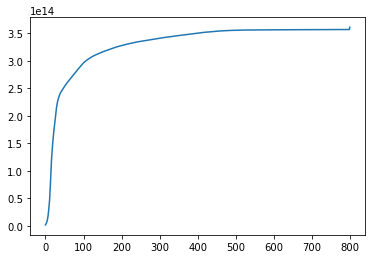

In [30]:
plt.plot(cdf)

In [31]:
cdf

array([1.68966868e+12, 2.77880950e+12, 4.07890349e+12, 5.60064522e+12,
       7.65347915e+12, 1.03310017e+13, 1.39191585e+13, 1.82188780e+13,
       2.41733741e+13, 3.14146155e+13, 3.88735770e+13, 4.75209568e+13,
       6.01227516e+13, 7.47529663e+13, 9.07215624e+13, 1.06537066e+14,
       1.20323727e+14, 1.31009664e+14, 1.40942036e+14, 1.49359887e+14,
       1.57121094e+14, 1.64676663e+14, 1.71302355e+14, 1.77640653e+14,
       1.83492042e+14, 1.89648190e+14, 1.95862555e+14, 2.02222713e+14,
       2.08806294e+14, 2.14264694e+14, 2.19098093e+14, 2.22949051e+14,
       2.26305316e+14, 2.29173180e+14, 2.31495063e+14, 2.33660582e+14,
       2.35745789e+14, 2.37766672e+14, 2.39570860e+14, 2.41042977e+14,
       2.42441173e+14, 2.43615377e+14, 2.44719083e+14, 2.45724860e+14,
       2.46871734e+14, 2.47972722e+14, 2.49191083e+14, 2.50322958e+14,
       2.51454967e+14, 2.52498124e+14, 2.53535728e+14, 2.54543384e+14,
       2.55451350e+14, 2.56416779e+14, 2.57387676e+14, 2.58271986e+14,
      

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


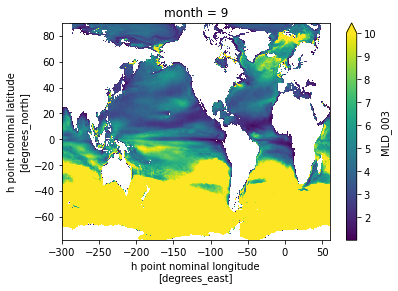

In [32]:
sept.where(sept>1).plot(vmax=10)

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


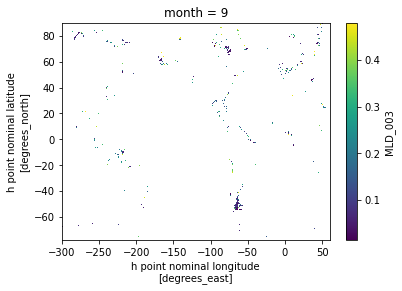

In [33]:
sept.where(sept<0.48).plot()